In [1]:
#Time Series AI
import pandas as pd




In [2]:
pip install git+https://github.com/timeseriesAI/tsai.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/timeseriesAI/tsai.git to /tmp/pip-req-build-sg_rwpyh
  Running command git clone -q https://github.com/timeseriesAI/tsai.git /tmp/pip-req-build-sg_rwpyh
     |████████████████████████████████| 2.5 MB 5.1 MB/s 
     |████████████████████████████████| 750.6 MB 10 kB/s 
     |████████████████████████████████| 19.1 MB 1.2 MB/s 
     |████████████████████████████████| 19.1 MB 1.1 MB/s 
     |████████████████████████████████| 21.0 MB 73.0 MB/s 
  Created wheel for tsai: filename=tsai-0.3.2-py3-none-any.whl size=245322 sha256=dd3dce7d468526781fd96f6b6f911a1aa19189c45e5c6b0160a8b5746a7d1788
  Stored in directory: /tmp/pip-ephem-wheel-cache-67jmwjzh/wheels/30/9d/b7/ff453ed04d0d9170035b3038a7f6e5bd7bbeff7033a5db5a6b
Successfully built tsai
  Attempting uninstall: torch
    Found existing installation: torch 1.12.1+cu113
    Uninstalling torch-1.12.1+cu113:
      Success

In [3]:
from tsai.all import *

In [4]:
pip install tsai[extras]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.9 MB 4.3 MB/s 
     |████████████████████████████████| 97 kB 6.7 MB/s 
     |████████████████████████████████| 9.8 MB 28.9 MB/s 
     |████████████████████████████████| 837 kB 66.1 MB/s 
     |████████████████████████████████| 136 kB 56.1 MB/s 
     |████████████████████████████████| 1.1 MB 67.1 MB/s 
     |████████████████████████████████| 141 kB 65.3 MB/s 
     |████████████████████████████████| 830 kB 44.6 MB/s 
     |████████████████████████████████| 822 kB 58.8 MB/s 
     |████████████████████████████████| 802 kB 55.8 MB/s 
     |████████████████████████████████| 802 kB 67.5 MB/s 
     |████████████████████████████████| 793 kB 70.9 MB/s 
     |████████████████████████████████| 793 kB 55.9 MB/s 
     |████████████████████████████████| 791 kB 55.6 MB/s 
     |████████████████████████████████| 786 kB 55.5 MB/s 
     |████████████████████████████

In [5]:
from tsai.all import *

epoch,train_loss,valid_loss,accuracy,time
0,0.720598,0.692032,0.630000,00:01
1,0.709943,0.686601,0.640000,00:01
2,0.702710,0.682513,0.640000,00:01
3,0.694106,0.679361,0.640000,00:01
4,0.684184,0.676790,0.640000,00:02
5,0.675246,0.674594,0.640000,00:02
6,0.663716,0.672628,0.640000,00:02
7,0.653326,0.670845,0.640000,00:02
8,0.640038,0.669226,0.640000,00:02
9,0.624490,0.667654,0.640000,00:02


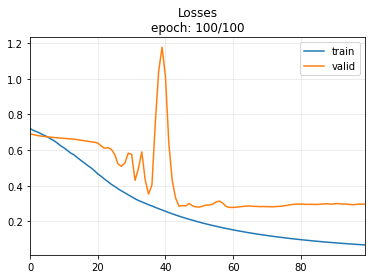

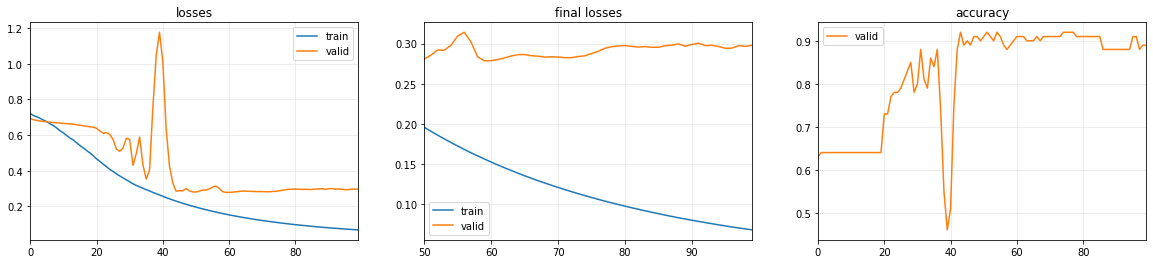

In [6]:
#Binary, univariate classification
from tsai.all import *
X, y, splits = get_classification_data('ECG200', split_data=False)
batch_tfms = TSStandardize()
clf = TSClassifier(X, y, splits=splits, path='models', arch=InceptionTimePlus, batch_tfms=batch_tfms, metrics=accuracy, cbs=ShowGraph())
clf.fit_one_cycle(100, 3e-4)
clf.export("clf.pkl") 

In [7]:
from tsai.inference import load_learner
clf = load_learner("models/clf.pkl")
probas, target, preds = clf.get_X_preds(X[splits[0]], y[splits[0]])

epoch,train_loss,valid_loss,accuracy,time
0,1.572334,1.436554,0.563260,00:34
1,1.307084,1.277954,0.626926,00:20
2,1.178924,1.275641,0.614355,00:20
3,1.089992,1.007429,0.665450,00:20
4,0.995330,0.980003,0.671127,00:22
5,0.891951,1.047790,0.658151,00:21
6,0.802077,0.943285,0.680454,00:20
7,0.719875,0.888241,0.713301,00:22
8,0.639881,0.868866,0.718573,00:20
9,0.564963,0.867799,0.716951,00:20


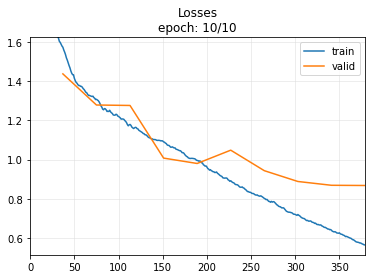

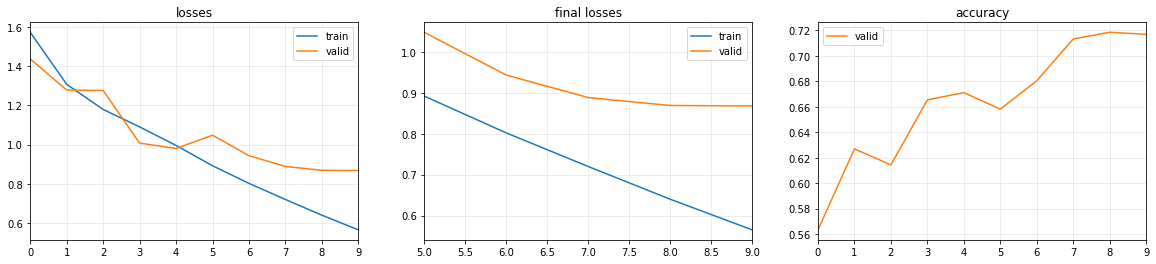

In [8]:
#Multi-class, multivariate classification
from tsai.all import *
X, y, splits = get_classification_data('LSST', split_data=False)
batch_tfms = TSStandardize(by_sample=True)
mv_clf = TSClassifier(X, y, splits=splits, path='models', arch=InceptionTimePlus, batch_tfms=batch_tfms, metrics=accuracy, cbs=ShowGraph())
mv_clf.fit_one_cycle(10, 1e-2)
mv_clf.export("mv_clf.pkl")

In [9]:
from tsai.inference import load_learner
mv_clf = load_learner("models/mv_clf.pkl")
probas, target, preds = mv_clf.get_X_preds(X[splits[0]], y[splits[0]])

119it [00:05, 22.63it/s]
66it [00:02, 30.38it/s]


arch: TSTPlus(c_in=24 c_out=1 seq_len=144 device=cpu, arch_config={}, kwargs={})


epoch,train_loss,valid_loss,_rmse,time
0,214.919983,195.539154,13.983532,00:03
1,213.157211,195.691315,13.988971,00:02
2,212.252975,195.760086,13.991429,00:02
3,211.889252,195.729187,13.990325,00:02
4,212.895584,195.576340,13.984861,00:02
5,210.020447,195.328873,13.976010,00:02
6,208.709900,194.966248,13.963032,00:02
7,204.958572,194.524384,13.947200,00:02
8,201.104507,193.985321,13.927861,00:02
9,194.972229,193.397949,13.906759,00:02


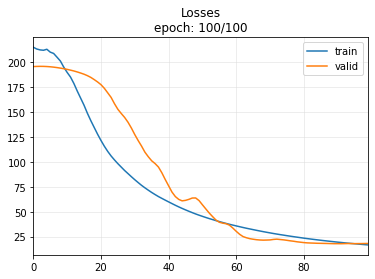

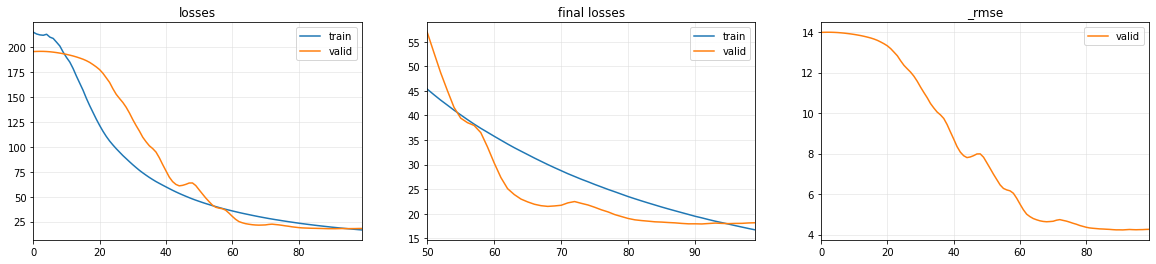

In [10]:
#Multivariate Regression
from tsai.all import *
X, y, splits = get_regression_data('AppliancesEnergy', split_data=False)
batch_tfms = TSStandardize(by_sample=True)
reg = TSRegressor(X, y, splits=splits, path='models', arch=TSTPlus, batch_tfms=batch_tfms, metrics=rmse, cbs=ShowGraph(), verbose=True)
reg.fit_one_cycle(100, 3e-4)
reg.export("reg.pkl")

In [11]:
from tsai.inference import load_learner
reg = load_learner("models/reg.pkl")
raw_preds, target, preds = reg.get_X_preds(X[splits[0]], y[splits[0]])

In [12]:
pip install sktime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [13]:
from sklearn.metrics import mean_squared_error, make_scorer
from tsai.all import *
from tsai.models.MINIROCKET import *
X_train, y_train, X_test, y_test = get_regression_data('AppliancesEnergy')
rmse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
mr_reg = MiniRocketRegressor(scoring=rmse_scorer)
mr_reg.fit(X_train, y_train)
mr_reg.save("minirocket_regressor")

In [14]:
mr_reg = load_rocket("minirocket_regressor")
y_pred = mr_reg.predict(X_test)
mean_squared_error(y_test, y_pred, squared=False)

2.3021762066553464

Dataset: Sunspots
downloading data...
...data downloaded. Path = data/forecasting/Sunspots.csv


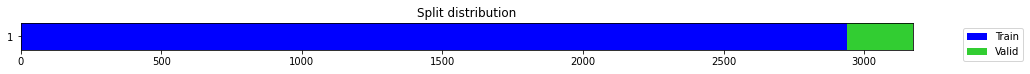

epoch,train_loss,valid_loss,mae,time
0,11530.839844,8729.030273,73.013573,00:37
1,11411.970703,8645.258789,72.543152,00:19
2,11310.625000,8503.026367,71.783470,00:19
3,11126.612305,8246.527344,70.501595,00:20
4,10843.595703,7770.049805,68.264816,00:20
5,10465.957031,6910.862305,64.495934,00:19
6,9969.635742,5877.626953,59.679741,00:20
7,9358.710938,5367.680664,57.337166,00:18
8,8666.462891,5473.038086,59.464977,00:19
9,7883.679688,5365.864258,61.763840,00:19


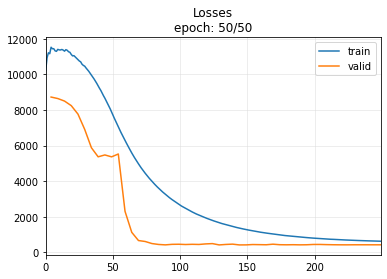

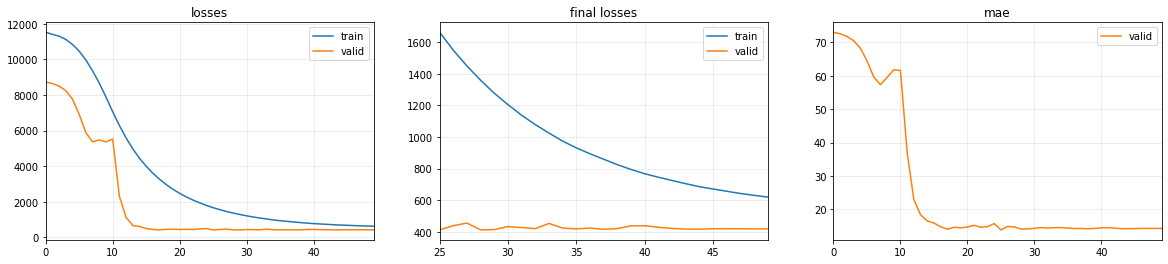

In [15]:
#Forecasting
from tsai.all import *
ts = get_forecasting_time_series("Sunspots").values
X, y = SlidingWindow(60, horizon=1)(ts)
splits = TimeSplitter(235)(y) 
batch_tfms = TSStandardize()
fcst = TSForecaster(X, y, splits=splits, path='models', batch_tfms=batch_tfms, bs=512, arch=TSTPlus, metrics=mae, cbs=ShowGraph())
fcst.fit_one_cycle(50, 1e-3)
fcst.export("fcst.pkl")

In [16]:
from tsai.inference import load_learner
fcst = load_learner("models/fcst.pkl", cpu=False)
raw_preds, target, preds = fcst.get_X_preds(X[splits[0]], y[splits[0]])
raw_preds.shape

torch.Size([2940, 1])

Dataset: Sunspots
downloading data...
...data downloaded. Path = data/forecasting/Sunspots.csv


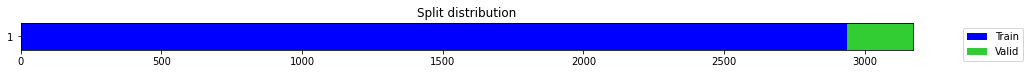

epoch,train_loss,valid_loss,mae,time
0,11549.856445,8832.415039,73.736320,00:19
1,11505.575195,8738.011719,73.636314,00:19
2,11367.787109,8567.156250,73.503281,00:19
3,11259.567383,8275.802734,73.235123,00:19
4,11004.546875,7750.405762,72.444756,00:19
5,10598.932617,7136.926270,70.898689,00:19
6,10056.986328,7004.771484,69.517632,00:20
7,9300.430664,5699.227539,61.765427,00:19
8,8338.204102,3870.867432,46.933323,00:19
9,7302.101074,1683.789185,32.342991,00:19


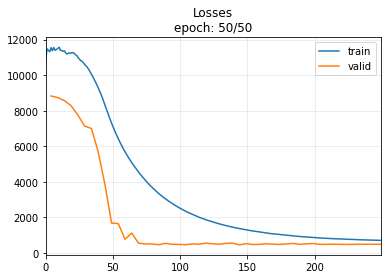

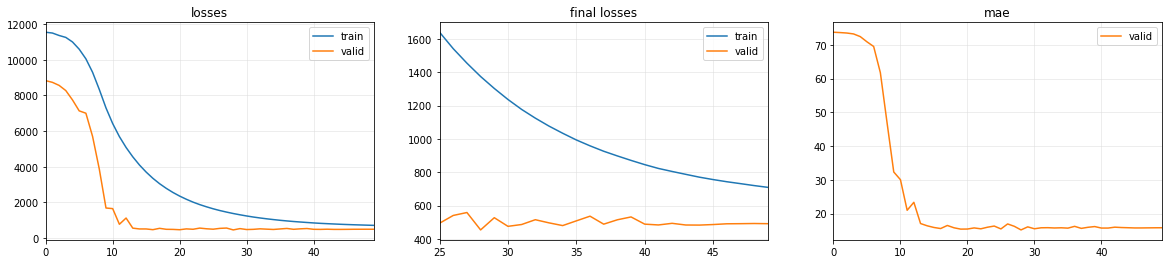

In [17]:
#Forecasting MultiStep
from tsai.all import *
ts = get_forecasting_time_series("Sunspots").values
X, y = SlidingWindow(60, horizon=3)(ts)
splits = TimeSplitter(235)(y) 
batch_tfms = TSStandardize()
fcst = TSForecaster(X, y, splits=splits, path='models', batch_tfms=batch_tfms, bs=512, arch=TSTPlus, metrics=mae, cbs=ShowGraph())
fcst.fit_one_cycle(50, 1e-3)
fcst.export("fcst.pkl")

In [18]:
from tsai.inference import load_learner
fcst = load_learner("models/fcst.pkl", cpu=False)
raw_preds, target, preds = fcst.get_X_preds(X[splits[0]], y[splits[0]])
raw_preds.shape

torch.Size([2938, 3])